## Project Workflow 

1. Dataset - Load the dataset, Preprocessing, Data cleaning, Handling imbalance in the data, Feature Building 
2. Exploratory Data Analysis - All sorts of plots, Geological plots for better analysis, Correlation plots between different features 
3. Model Building - Designing the model, Building the model and working on metrics of the model. 

### Dataset

In [1]:
# Importing Necessary Libraries 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.model_selection import train_test_split # to split the data into training and testing 
from sklearn.preprocessing import OneHotEncoder # To encode our categorical data into numerical format  

from imblearn.over_sampling import SMOTE # Importing SMOTE - a sampling method to handle imbalance in our target variable

In [2]:
df = pd.read_csv('Transactiondata.csv') # Importing data 
df.head() # Displaying our dataframe 

,Transaction_ID,Agent_ID,Agent_Type,Operator_ID,Operator_Type,Sender_Name,Sender_Country,Sender_State,Sender_District,Sender_Occupation,...,Receiver_Country,Receiver_State,Receiver_District,Receiver_Occupation,Receiver_Affiliation,Receiver_Mode_Txn,Date_Of_Txn,In_Working_Hours,Amount,Is_Fraud
0,TR1,AGNT3,Send,OPR15,Admin,Gael Saunders,USA,Utah,Cache,Retailer,...,Brazil,Acre,Bujari,Banker,Employee,Cash,5/1/2016,Yes,3502,0
1,TR2,AGNT1,Send,OPR1,Employee,Julieta Turner,USA,California,Sacramento,Accountant,...,Brazil,Acre,Xapuri,Consultant,Employee,Cash,12/1/2016,No,1399,0
2,TR3,AGNT2,Send,OPR8,Employee,Kane Leonard,USA,Nevada,Eureka,Broker,...,Colombia,Antioquia,Antioquia,Accountant,Employee,Bank Account,31-01-2016,Yes,5223,0
3,TR4,AGNT1,Send,OPR2,Admin,London Wilkinson,USA,California,Sacramento,Broker,...,Brazil,Bahia,Valenca,Banker,New User,Cash,27-01-2016,Yes,5959,0
4,TR5,AGNT8,Both,OPR42,Owner,Lucy Vinson,USA,Utah,Emery,I.T Professional,...,Mexico,Durango,Durango,Agent,Customer,Cash,10/1/2016,No,5922,0


### Exploratory Data Analysis

In [3]:
df.info() # Information about our dataset - This code snippet shows the null count, type of every variable or column of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Transaction_ID        11000 non-null  object
 1   Agent_ID              11000 non-null  object
 2   Agent_Type            11000 non-null  object
 3   Operator_ID           11000 non-null  object
 4   Operator_Type         11000 non-null  object
 5   Sender_Name           11000 non-null  object
 6   Sender_Country        11000 non-null  object
 7   Sender_State          11000 non-null  object
 8   Sender_District       11000 non-null  object
 9   Sender_Occupation     11000 non-null  object
 10  Sender_Mode_Txn       11000 non-null  object
 11  Sender_Affiliation    11000 non-null  object
 12  Receiver_Name         11000 non-null  object
 13  Receiver_Country      11000 non-null  object
 14  Receiver_State        11000 non-null  object
 15  Receiver_District     11000 non-null

In [4]:
## Data preproceesing 
df.isna().sum()

Transaction_ID          0
Agent_ID                0
Agent_Type              0
Operator_ID             0
Operator_Type           0
Sender_Name             0
Sender_Country          0
Sender_State            0
Sender_District         0
Sender_Occupation       0
Sender_Mode_Txn         0
Sender_Affiliation      0
Receiver_Name           0
Receiver_Country        0
Receiver_State          0
Receiver_District       0
Receiver_Occupation     0
Receiver_Affiliation    0
Receiver_Mode_Txn       0
Date_Of_Txn             0
In_Working_Hours        0
Amount                  0
Is_Fraud                0
dtype: int64

In [5]:
df.describe()

,Amount,Is_Fraud
count,11000.000000,11000.000000
mean,3059.045636,0.111545
std,1697.539026,0.314821
min,100.000000,0.000000
25%,1595.750000,0.000000
50%,3084.500000,0.000000
75%,4507.000000,0.000000
max,6000.000000,1.000000


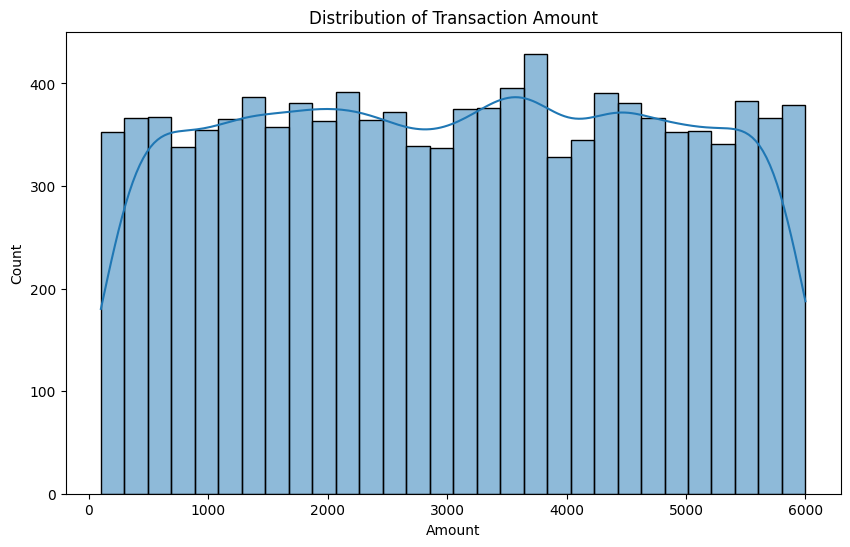

In [6]:
plt.figure(figsize=(10, 6)) # Setting the figure size to be 10 px x 6 px
sns.histplot(df['Amount'], bins=30, kde=True) # create a histplot using seaborn and we pass the Amount feature to this histplot function
plt.title('Distribution of Transaction Amount')
plt.show()

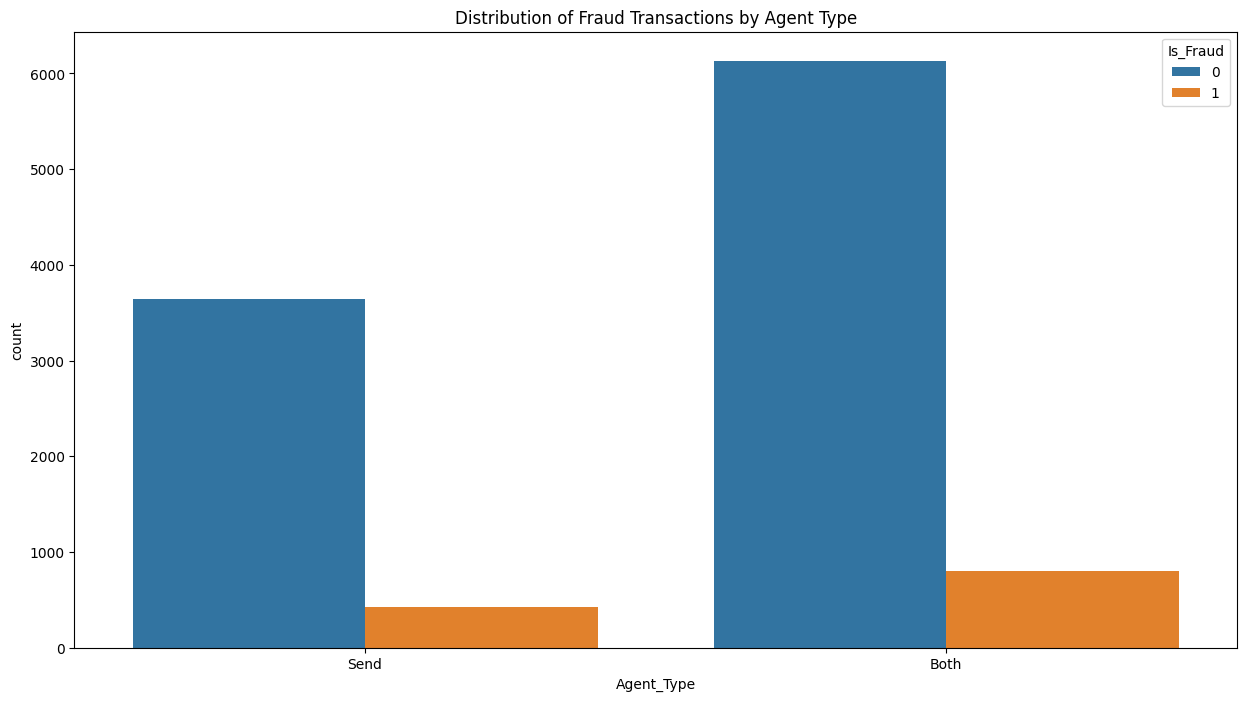

In [7]:
# Creating a countplot and pass our agent type varible into the countplot and pass the IS_Fraud varible as our hue function to distinguish and add a label 
plt.figure(figsize=(15, 8))
sns.countplot(x='Agent_Type', hue='Is_Fraud', data=df) 
plt.title('Distribution of Fraud Transactions by Agent Type')
plt.show()

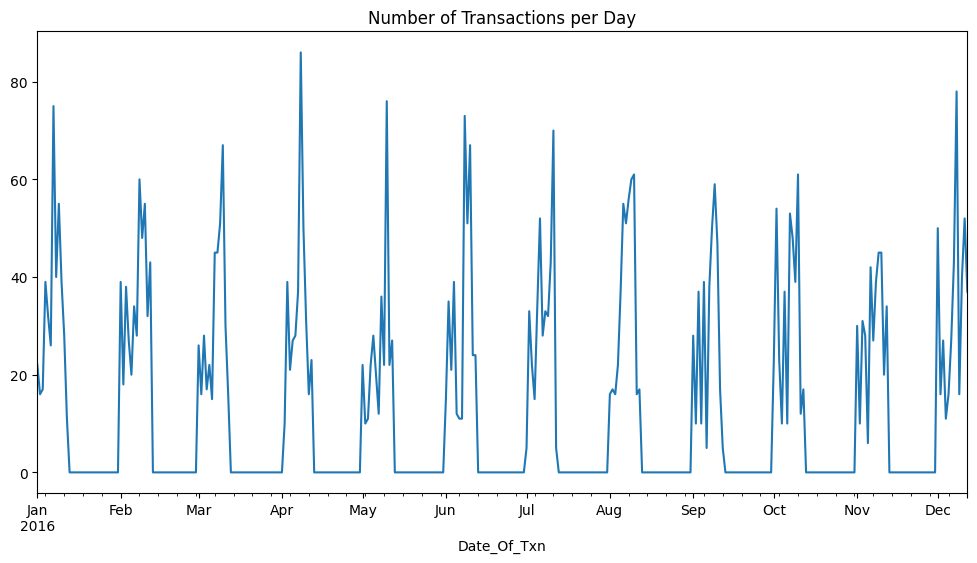

In [8]:
# Creating a lineplot that shows the distribution between the date of transactions and number of transactions each day along the year 
df['Date_Of_Txn'] = pd.to_datetime(df['Date_Of_Txn'], errors='coerce')
df.set_index('Date_Of_Txn', inplace=True)
df.resample('D').size().plot(title='Number of Transactions per Day', figsize=(12, 6))
plt.show()

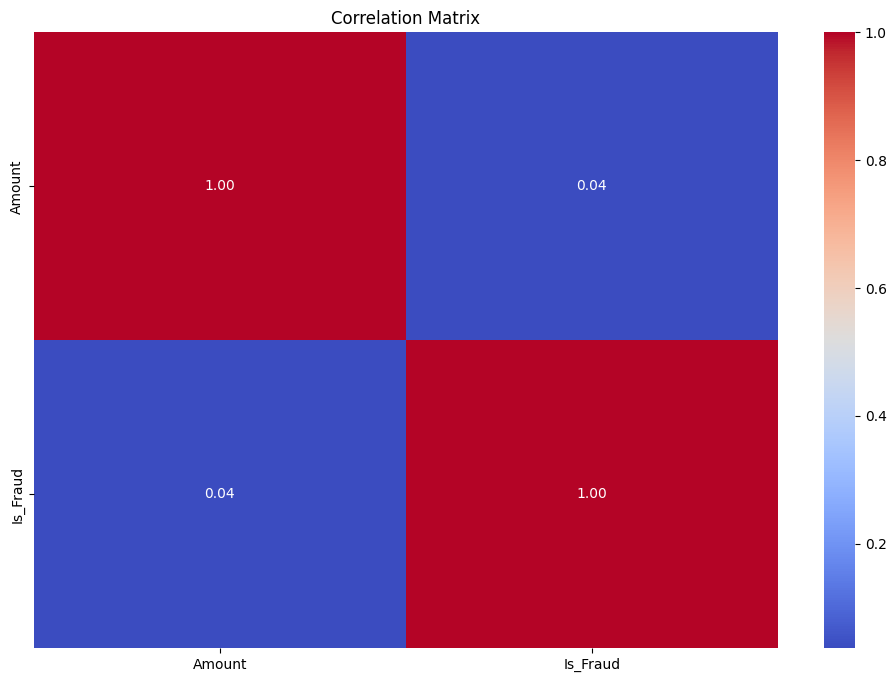

In [9]:
# Create a correlation matrix that shows the correlation between our numeric columns in our dataset 
numeric_columns = df.select_dtypes(include='number').columns
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Model Building

### Random Forest Classifier 

In [10]:
# Import necessary libraries to implement our Random Forest Classifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

In [11]:
# Drop our features that are not necessary 
df_2 = df.drop(['Transaction_ID', 'Sender_Name', 'Receiver_Name'], axis = 1)

In [12]:
# Create encoded dummies for our categorical data 
df_2 = pd.get_dummies(df_2)

In [13]:
# Split our data into features (X) and target variable (y)
X = df_2.drop(['Is_Fraud'], axis = 1)
y = df_2['Is_Fraud']

In [14]:
# Implement our StandardScaler and scale our features and store into the new variable X_scaled 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
# Import SMOTE - Synthetic Minority Oversampling Technique and sample our data so that the imbalance in our data is handled before splitting into training and testing data 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [32]:
#  Split our data into training and testing using train_test_split function from sklearn 
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [17]:
# Import Randomforestclassifier model and fit our training data into our model 
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [18]:
# Create a prediction for our testing data and print out our confusion matrix and classification report 
prediction = model.predict(X_test)
print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))

[[2932    8]
 [ 332 2592]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95      2940
           1       1.00      0.89      0.94      2924

    accuracy                           0.94      5864
   macro avg       0.95      0.94      0.94      5864
weighted avg       0.95      0.94      0.94      5864



### Logistic Regression

In [22]:
# Similar to the model above, we import the logistic Regression model and fit our training and testing data into the model
from sklearn.linear_model import LogisticRegression
model2 = LogisticRegression()
model2.fit(X_train, y_train)

LogisticRegression()

In [23]:
prediction2 = model2.predict(X_test)
print(confusion_matrix(y_test, prediction2))
print(classification_report(y_test, prediction2))

[[1960  980]
 [ 942 1982]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2940
           1       0.67      0.68      0.67      2924

    accuracy                           0.67      5864
   macro avg       0.67      0.67      0.67      5864
weighted avg       0.67      0.67      0.67      5864



### Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
pred = tree.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[2620  320]
 [ 294 2630]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      2940
           1       0.89      0.90      0.90      2924

    accuracy                           0.90      5864
   macro avg       0.90      0.90      0.90      5864
weighted avg       0.90      0.90      0.90      5864



### Support Vector Machines (SVM)

In [26]:
from sklearn.svm import SVC
vector_machine  = SVC()
vector_machine.fit(X_train, y_train)

SVC()

In [27]:
pred2 = vector_machine.predict(X_test)
print(confusion_matrix(y_test, pred2))
print(classification_report(y_test, pred2))

[[2804  136]
 [ 289 2635]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      2940
           1       0.95      0.90      0.93      2924

    accuracy                           0.93      5864
   macro avg       0.93      0.93      0.93      5864
weighted avg       0.93      0.93      0.93      5864



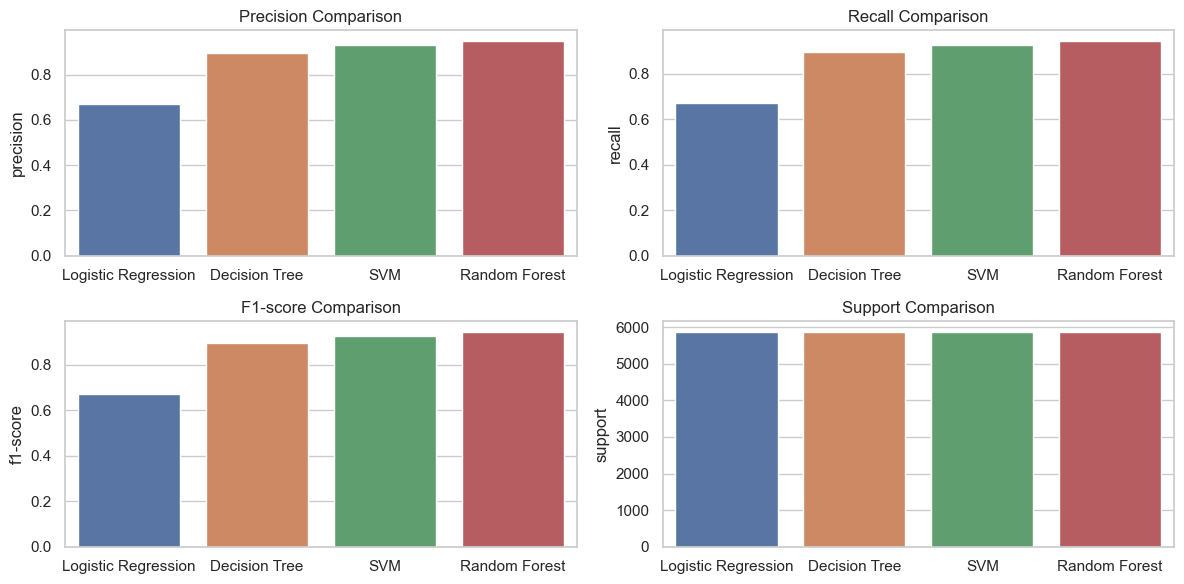

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Create and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Random Forest": RandomForestClassifier()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = report["weighted avg"]

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame(results).T

# Plot the metrics
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

metrics = ["precision", "recall", "f1-score", "support"]

for i, metric in enumerate(metrics):
    plt.subplot(2, 2, i + 1)
    sns.barplot(x=df.index, y=df[metric])
    plt.title(f"{metric.capitalize()} Comparison")

plt.tight_layout()
plt.show()


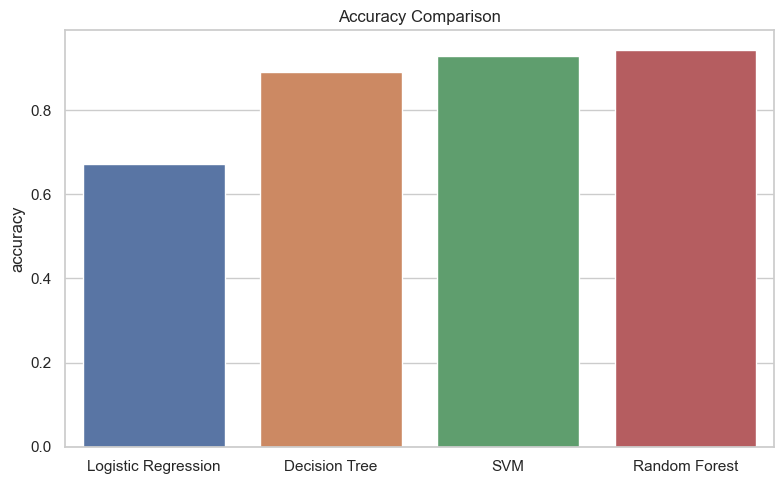

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {"accuracy": accuracy}

# Create a DataFrame from the results
import pandas as pd
df = pd.DataFrame(results).T

# Plot accuracy
sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))

sns.barplot(x=df.index, y=df["accuracy"])
plt.title("Accuracy Comparison")

plt.tight_layout()
plt.show()
